In [1]:
import pandas as pd
import numpy as np
import pylab as plt
plt.style.use('ggplot')

In [2]:

def quantize_dataframe(df):
    """
    Quantize the 'L' column of the dataframe to the nearest 0.5 and then aggregate 
    the other columns using the 'max' function within each collapsed interval.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'L' and other numerical columns.

    Returns:
    - pd.DataFrame: Quantized DataFrame.
    """
    # Quantize the 'L' column
    #df['L_quantized'] = (df['L'] * 2).round() / 2
    df['L_quantized'] = (df['L']).round()
    
    # Define aggregation for other columns
    aggregation = {col: 'max' for col in df.columns if col != 'L_quantized'}
    aggregation['L'] = 'first'  # For 'L' column, just keep the first value (or replace with 'mean' if required)
    
    # Group by the quantized values
    df_quantized = df.groupby('L_quantized').agg(aggregation).reset_index(drop=True)
    
    # Rename 'L' column to its original name and drop the quantized column
    df_quantized = df_quantized.rename(columns={'L_quantized': 'L'})
    
    return df_quantized

In [3]:
df=pd.read_csv('pXhase2results/RESDSM2_.csv')
df['L'] = [np.round(x,1) for x in df.nq_mean.values]
df1=pd.read_csv('pXhase2results/RESphase2_.csv')
df1['L'] = [np.round(x,1) for x in df1.nq_mean.values]
dfm=quantize_dataframe(df).groupby('L').max().sort_values('L').acc.cummax()
df1m=quantize_dataframe(df1).groupby('L').max().sort_values('L').acc.cummax()


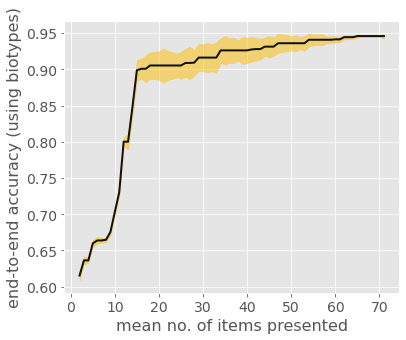

In [4]:
Lqr=df1.groupby('L_quantized').count().run
df1s=df1.groupby('L_quantized').std().sort_index().acc*(2/np.sqrt(Lqr.values))
df1m=df1.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#df1m=df1.groupby('L').max().sort_index().acc.cummax().ewm(alpha=.4).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s+epx,df1m-df1s-epx,alpha=.5,color='#FFBF00')
#dfm.plot(color='k',lw=LW)
df1m.plot(color='#111111',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (using biotypes)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase2results_new/Lvsacc_onlybiotype.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s),rsuffix='_std').to_excel('./phase2results_new/itemsVsacc.xlsx')

In [5]:
df1m.head(60)

L_quantized
2.0     0.615328
3.0     0.636347
4.0     0.636347
5.0     0.659761
6.0     0.663794
7.0     0.663794
8.0     0.664788
9.0     0.675523
10.0    0.703269
11.0    0.730412
12.0    0.800112
13.0    0.800112
14.0    0.848306
15.0    0.898651
16.0    0.900757
17.0    0.900757
18.0    0.905293
19.0    0.905293
20.0    0.905293
21.0    0.905293
22.0    0.905293
23.0    0.905293
24.0    0.905293
25.0    0.905293
26.0    0.908789
27.0    0.908789
28.0    0.909166
29.0    0.916167
30.0    0.916167
31.0    0.916167
32.0    0.916167
33.0    0.916167
34.0    0.926113
35.0    0.926113
36.0    0.926113
37.0    0.926113
38.0    0.926113
39.0    0.926113
40.0    0.926113
41.0    0.927432
42.0    0.927926
43.0    0.927926
44.0    0.931286
45.0    0.931286
46.0    0.931286
47.0    0.936002
48.0    0.936002
49.0    0.936002
50.0    0.936002
51.0    0.936002
52.0    0.936002
53.0    0.936002
54.0    0.940788
55.0    0.940788
56.0    0.940788
57.0    0.940788
58.0    0.940788
59.0    0.940788
60

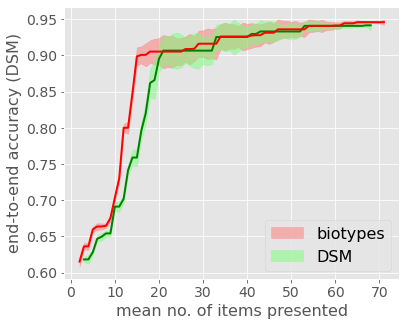

In [6]:
Lqr=df.groupby('L_quantized').count().run
Lqr1=df1.groupby('L_quantized').count().run
dfs=df.groupby('L_quantized').std().sort_index().acc.ewm(alpha=.51).mean()*(2/np.sqrt(Lqr.values))
dfm=df.groupby('L_quantized').max().sort_index().acc.cummax()
df1s=df1.groupby('L_quantized').std().sort_index().acc.ewm(alpha=.51).mean()*(2/np.sqrt(Lqr1.values))
df1m=df1.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2

plt.fill_between(df1m.index.values,df1m+df1s+epx,df1m-df1s-epx,alpha=.5,color='#FF7777')
plt.fill_between(dfm.index.values,dfm+dfs+epx,dfm-dfs-epx,alpha=.5,color='#77FF77')
dfm.plot(color='g',lw=LW)
df1m.plot(color='r',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (DSM)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
plt.legend(['biotypes','DSM'],fontsize=16)

#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase2results_new/Lvsacc_both.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s),rsuffix='_std').to_excel('./phase2results_new/itemsVsacc_DSM.xlsx')


In [7]:
df1[df1.acc.between(.91,.92)].sort_values('L',ascending=False)

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L,L_quantized
2304,0.95,0.94,0.911800,0.919964,0.967285,69.755703,2.447202,11,15,10,69.8,70.0
1465,0.95,0.95,0.918552,0.934884,0.952560,69.590304,2.625269,12,15,6,69.6,70.0
1048,0.99,0.94,0.917415,0.819815,0.972396,69.398289,3.090541,15,15,4,69.4,69.0
1464,0.95,0.95,0.913328,0.919840,0.936132,69.180608,2.712400,11,15,6,69.2,69.0
2934,0.95,0.99,0.919437,0.929687,0.812692,69.163498,2.400863,11,15,13,69.2,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.99,0.94,0.916107,0.846374,0.936270,30.826996,4.146614,16,3,1,30.8,31.0
4019,0.94,0.99,0.913474,0.913788,0.831080,30.430608,4.624075,16,3,19,30.4,30.0
4227,0.95,0.95,0.913150,0.928161,0.925003,29.495247,3.909501,14,3,20,29.5,30.0
2548,0.99,0.99,0.916018,0.806070,0.833896,29.478137,4.963028,15,3,12,29.5,30.0


In [8]:
# we can choose 15-3 for L~25 (acc~.92)
# we can choose 14-2 for L~13 items presented (acc~0.89)

In [9]:
#df1m_=df1.groupby('L').mean()

In [10]:
#df1m_.reset_index()[df1m_.reset_index().L.between(20,32)].set_index('L').acc.plot()

In [11]:
# get importance bounds
modelname='pXhase2results/P2_12_10_29.mod'
# load model
import dill
with open(modelname,'rb') as f:
    M=dill.load(f)
    
def getCF(Rs,LABELS=['B1','B2','B3']):  
    CF=np.zeros([3,3])
    s2=Rs.s1
    s3=Rs.s2
    c2=Rs.c1
    c3=Rs.c2
    CF=[[c2*c3,1-c2,c2*(1-c3)],[(1-s2)*(1-s3),s2,(1-s2)*s3],[c2*(1-s3),1-c2,c2*s3]]

    CF=pd.DataFrame(CF,columns=LABELS)
    CF.index=CF.columns
    return CF

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
df1_=df1[(df1.nest>=2) & (df1.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df1_.iterrows():
    count=count+1
    cf=getCF(i[1])
    cfvar=getCF(i[1])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase2results_new/confusion_phase2.csv')
S_

,B1,B2,B3
B1,"0.934 (0.903, 0.965)","0.036 (0.015, 0.057)","0.03 (0.009, 0.051)"
B2,"0.011 (0.005, 0.017)","0.89 (0.85, 0.93)","0.099 (0.061, 0.137)"
B3,"0.099 (0.056, 0.142)","0.036 (0.015, 0.057)","0.866 (0.818, 0.914)"


In [13]:
S_.to_excel('phase2results_new/confusion_phase2.xlsx')

In [14]:
df_=df[(df.nest>=2) & (df.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df_.iterrows():
    count=count+1
    cf=getCF(i[1],LABELS=['D1','D2',"D5"])
    cfvar=getCF(i[1],LABELS=['D1','D2',"D5"])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase2results_new/confusion_dsm.csv')
S_

,D1,D2,D5
D1,"0.927 (0.897, 0.957)","0.045 (0.028, 0.062)","0.028 (0.006, 0.05)"
D2,"0.01 (0.005, 0.015)","0.934 (0.901, 0.967)","0.056 (0.027, 0.085)"
D5,"0.147 (0.099, 0.195)","0.045 (0.028, 0.062)","0.808 (0.758, 0.858)"


In [15]:
xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'

df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)#.head()                                                          
DELVAR=['DSM','DX','project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
df=df.dropna()
df0=df
feature_names=df.drop(['Biotype'],axis=1).columns


In [16]:
df0.columns

Index(['Biotype', 'panss_p1', 'panss_p2', 'panss_p3', 'panss_p4', 'panss_p5',
       'panss_p6', 'panss_p7', 'panss_n1', 'panss_n2', 'panss_n3', 'panss_n4',
       'panss_n5', 'panss_n6', 'panss_n7', 'panss_g1', 'panss_g2', 'panss_g3',
       'panss_g4', 'panss_g5', 'panss_g6', 'panss_g7', 'panss_g8', 'panss_g9',
       'panss_g10', 'panss_g11', 'panss_g12', 'panss_g13', 'panss_g14',
       'panss_g15', 'panss_g16', 'madrs_1', 'madrs_2', 'madrs_3', 'madrs_4',
       'madrs_5', 'madrs_6', 'madrs_7', 'madrs_8', 'madrs_9', 'madrs_10',
       'young_1', 'young_2', 'young_3', 'young_4', 'young_5', 'young_6',
       'young_7', 'young_8', 'young_9', 'young_10', 'young_11', 'sfs_setotal',
       'sfs_ictotal', 'sfs_ipcptotal', 'sfs_ipcctotal', 'sfs_retotal',
       'sfs_prototal', 'sfs_oetotal', 'Age', 'Sex', 'BSNIP1vs2', 'Psychosis',
       'BACS_COMP_Z_within', 'BACS_Verb_Mem_within_imputed',
       'BACS_Dig_Seq_z_within_imputed', 'BACS_Tok_Mot_z_within_imputed',
       'BACS_Verb_Flu_z_wit

In [17]:
len(feature_names)

78

In [18]:
#MODELS

In [19]:
import glob
MODELS=glob.glob('pXhase2results/P2_14_*')+glob.glob('pXhase2results/P2_15_*')
I={}
for modelname in MODELS:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP3=M[3]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio3_vs_all':IMP3,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    I[modelname]=IMPdf.transpose().reset_index()
I=pd.concat(I.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

In [20]:
IMP1

array([0.01158404, 0.0126213 , 0.01060157, 0.01149804, 0.00886265,
       0.01322127, 0.01109299, 0.01392842, 0.01695976, 0.00953191,
       0.00827252, 0.01252011, 0.01061984, 0.01038995, 0.01786669,
       0.01317485, 0.01606745, 0.01133147, 0.009221  , 0.0165983 ,
       0.01564304, 0.00784596, 0.01458082, 0.00945005, 0.01083982,
       0.02267822, 0.0116248 , 0.01019675, 0.00711391, 0.01397859,
       0.00970195, 0.01080574, 0.01393487, 0.01081417, 0.00524589,
       0.01591472, 0.01213948, 0.00973015, 0.01573427, 0.00789686,
       0.0079491 , 0.01556225, 0.00979169, 0.01096382, 0.00788025,
       0.00657647, 0.01106858, 0.01088278, 0.01306164, 0.00524612,
       0.00955397, 0.01505114, 0.01327131, 0.01376363, 0.01339345,
       0.01768519, 0.01878792, 0.02082858, 0.01344567, 0.01582995,
       0.01308086, 0.        , 0.02351378, 0.01590985, 0.01779871,
       0.01521768, 0.01603652, 0.01999249, 0.01274395, 0.00897392,
       0.014157  , 0.01557816, 0.0171428 , 0.01936273, 0.01229

In [21]:
from itertools import cycle, islice
custom_colors = list(islice(cycle(['#AF1D1D','#4575F0','#1AB44A']), None, 3))
plt.style.use('seaborn-whitegrid')

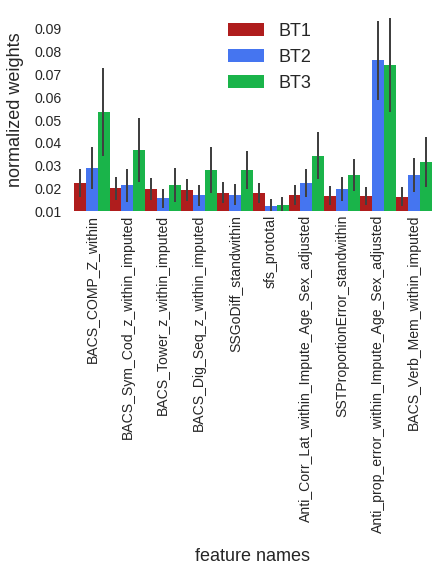

In [22]:
fig=plt.figure(figsize=[6,3.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()

sImean=Imean.sort_values('bio1_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsd=Isd.loc[:,sImean.columns]


FS=18
FS2=14
w=0.33
LW=2
COL='.25'



sImean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImean.columns)), sImean.loc['bio2_vs_all',:].values,
             sIsd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))-w, sImean.loc['bio1_vs_all',:].values,
             sIsd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))+w, sImean.loc['bio3_vs_all',:].values,
             sIsd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.7, 1),ncol=1)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=10)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2, rotation=0);
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('phase2results_new/sorted_impPhase3.png',dpi=300,bbox_inches='tight',transparent=True)

In [23]:
sImean.columns

Index(['BACS_COMP_Z_within', 'BACS_Sym_Cod_z_within_imputed',
       'BACS_Tower_z_within_imputed', 'BACS_Dig_Seq_z_within_imputed',
       'SSGoDiff_standwithin', 'sfs_prototal',
       'Anti_Corr_Lat_within_Impute_Age_Sex_adjusted',
       'SSTProportionError_standwithin',
       'Anti_prop_error_within_Impute_Age_Sex_adjusted',
       'BACS_Verb_Mem_within_imputed'],
      dtype='object')

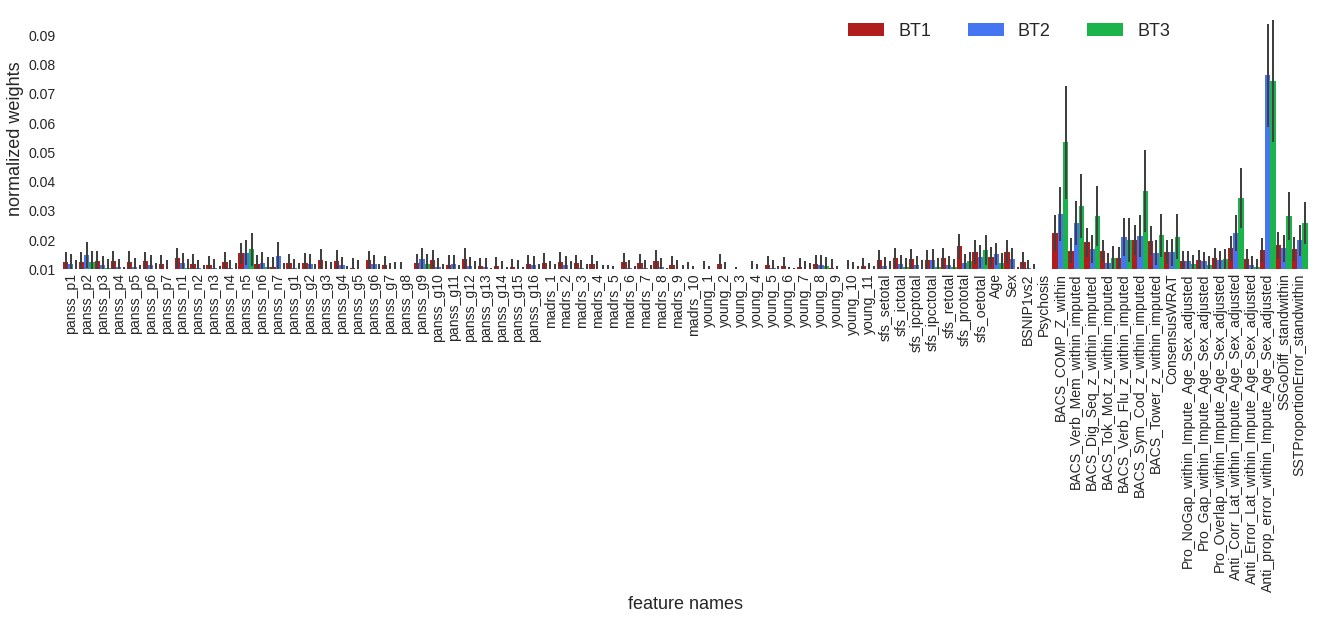

In [24]:
fig=plt.figure(figsize=[20,4.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'
Imean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imean.columns)), Imean.loc['bio2_vs_all',:].values,
             Isd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))-w, Imean.loc['bio1_vs_all',:].values,
             Isd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))+w, Imean.loc['bio3_vs_all',:].values,
             Isd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(Imean.columns,rotation=90);
#plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0)
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);

plt.savefig('phase2results_new/impPhase2.png',dpi=300,bbox_inches='tight',transparent=True)

In [25]:
Imean.transpose().join(Isd.transpose(),rsuffix='_cnfband').to_excel('./phase2results_new/feature_impotance_biotype.xlsx')

In [26]:
custom_colors = list(islice(cycle(['.1','.4','.7']), None, 3))

In [27]:
import glob
MODELSdsm=glob.glob('pXhase2results/DSM2_13_*')+glob.glob('pXhase2results/DSM2_14_*')
Idsm={}
for modelname in MODELSdsm:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP5=M[5]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio5_vs_all':IMP5,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    Idsm[modelname]=IMPdf.transpose().reset_index()
Idsm=pd.concat(Idsm.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [28]:
#Imeandsm

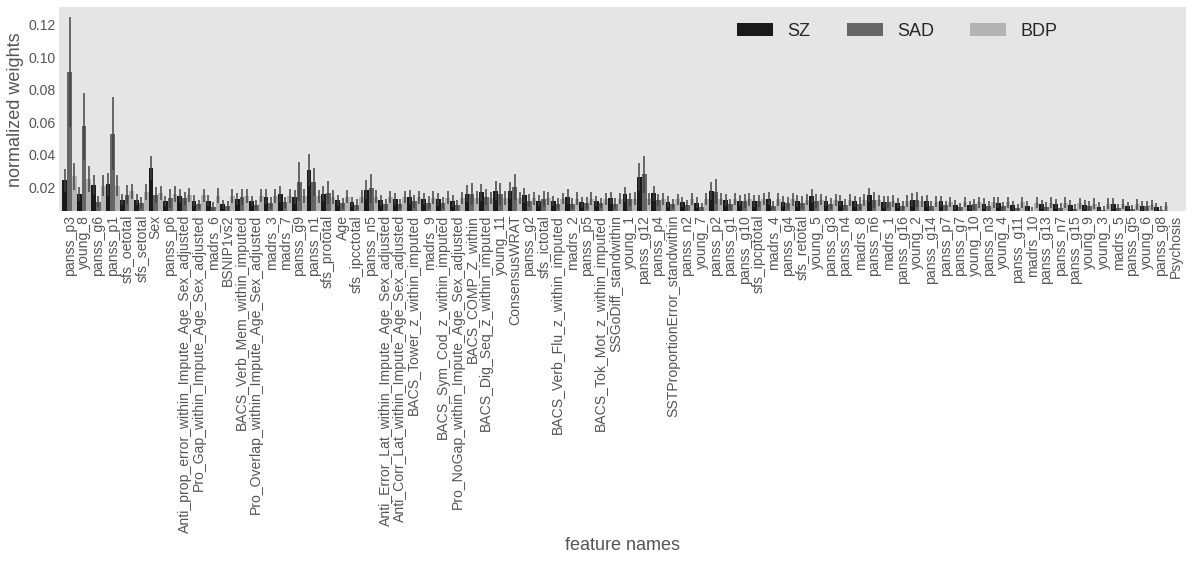

In [29]:
fig=plt.figure(figsize=[18,3.5])
Imeandsm=Idsm.groupby('index').mean()
Isddsm=Idsm.groupby('index').std()

Imeandsm=Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False)
Isddsm=Isddsm.transpose()
Isddsm=Isddsm.loc[Imeandsm.index,:]
Isddsm=Isddsm.transpose()
Imeandsm=Imeandsm.transpose()


if 'DX' in Imeandsm.columns:
    Imeandsm=Imeandsm.drop('DX',axis=1)
    Isddsm=Isddsm.drop('DX',axis=1)
columns=Imeandsm.columns
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
Imeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(columns)), Imeandsm.loc['bio2_vs_all',:].values,
             Isddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(columns))-w, Imeandsm.loc['bio1_vs_all',:].values,
             Isddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(columns))+w, Imeandsm.loc['bio5_vs_all',:].values,
             Isddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

plt.gca().set_xticks(np.arange(len(columns)))
plt.gca().set_xticklabels(columns,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.0051,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase2results_new/impDSM2.png',dpi=300,bbox_inches='tight',transparent=True)

In [30]:
sImeandsm=Imeandsm.sort_values('bio5_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsddsm=Isddsm.loc[:,sImeandsm.columns]

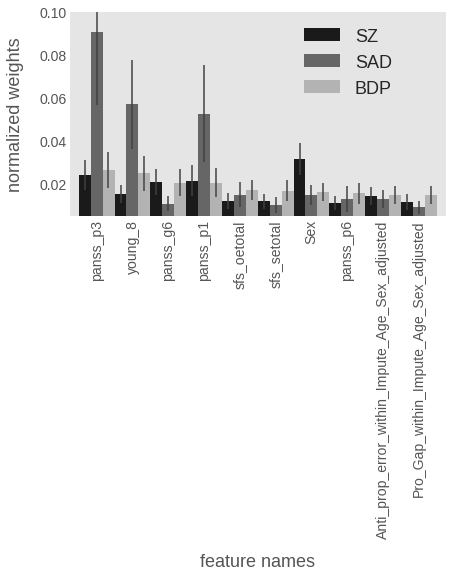

In [31]:
fig=plt.figure(figsize=[6,3.5])
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
sImeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImeandsm.columns)), sImeandsm.loc['bio2_vs_all',:].values,
             sIsddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))-w, sImeandsm.loc['bio1_vs_all',:].values,
             sIsddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))+w, sImeandsm.loc['bio5_vs_all',:].values,
             sIsddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=1)
ax=plt.gca()
ax.set_ylim(0.0051,0.1)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=15)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase2results_new/sorted_impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [32]:
Imeandsm

,panss_p3,young_8,panss_g6,panss_p1,sfs_oetotal,sfs_setotal,Sex,panss_p6,Anti_prop_error_within_Impute_Age_Sex_adjusted,Pro_Gap_within_Impute_Age_Sex_adjusted,...,panss_g13,panss_n7,panss_g15,young_9,young_3,madrs_5,panss_g5,young_6,panss_g8,Psychosis
index,,,,,,,,,,,,,,,,,,,,,
bio1_vs_all,0.024137,0.015395,0.020934,0.021500,0.012088,0.011900,0.031730,0.011279,0.014388,0.011500,...,0.009070,0.009474,0.009047,0.008800,0.007670,0.009614,0.008071,0.008355,0.007637,0.0
bio2_vs_all,0.090547,0.057101,0.010785,0.052627,0.015006,0.010252,0.014862,0.012834,0.012799,0.009093,...,0.007746,0.007047,0.006529,0.007998,0.005885,0.006871,0.006173,0.008000,0.005583,0.0
bio5_vs_all,0.026312,0.024916,0.020634,0.020626,0.017265,0.016865,0.016184,0.015669,0.014931,0.014841,...,0.010142,0.010019,0.009795,0.009516,0.009494,0.009206,0.009097,0.008915,0.007929,0.0


In [33]:
Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False).to_excel('phase2results_new/dsmfeaturessorted.xlsx')
Imean.transpose().sort_values('bio3_vs_all',ascending=False).to_excel('phase2results_new/phase2featuressorted.xlsx')

In [34]:

def getAVlen(clf,X,cid=0):
    RES=pd.DataFrame(columns=['Lmean','Lstd','compid'])
    count=0
    threshold={}
    feature={}
    node_indicator={}
    leaf_id={}

    for i in clf.estimators_:
        feature[count]= i.tree_.feature
        node_indicator[count] = i.tree_.decision_path(X)
        count=count+1
    
    #print(count)
    L=[]
    LL=[]
    for sample_id in np.arange(len(X)):
        L=[]
        for i in range(count-1):
            L=L+list(feature[i][node_indicator[i].indices[node_indicator[i].indptr[sample_id] : node_indicator[i].indptr[sample_id + 1]]][1:-1])
        LL=np.append(LL,len(list(set(L))))
    L=list(set(L))
    
    RES['Lmean']=[np.mean(LL)]
    RES['Lstd']=[np.std(LL)]
    RES['compid']=[cid]
    return RES    
    


In [35]:
Ef=pd.read_excel('./2022summer/adeptphase3/BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['DSM','DSM String']].dropna()
Ef_.DSM=[int(x) for x in Ef_.DSM.values]
xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'

df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)#.head()                                                          
DELVAR=['DSM','DX','project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
df=df.dropna()
df0=df
Xphase1=df.dropna().iloc[:,1:].values.astype(np.float32)
feature_names=df.drop(['Biotype'],axis=1).columns

df=df.join(Ef_).dropna()#[['DSM','Biotype']]
df=df[df['DSM String']!='HC'].drop(['Biotype','DSM String'],axis=1)
Xdsm=df.drop('DSM',axis=1).values.astype(np.float32)

In [36]:
def getModelAvLen(modelfile='phase2results_new/P2_10_3_0.mod'):
    import sys
    import warnings

    if not sys.warnoptions:
        warnings.simplefilter("ignore")    
        
    with open(modelfile,'rb') as f:
        M=dill.load(f)
    return pd.concat([getAVlen(M[key]['estimator'],Xphase1,cid=key) for key in M.keys()])

In [37]:
import glob
MODELS=glob.glob('pXhase2results/P2_14_2_*.mod')#+glob.glob('P2models/P2_15_3_*.mod')
af=pd.concat([getModelAvLen(model)for model in MODELS])
af

,Lmean,Lstd,compid
0,8.769962,2.628147,1
0,8.836502,2.782666,2
0,7.901141,2.507350,3
0,8.756654,2.451760,1
0,9.176806,2.741928,2
...,...,...,...
0,8.900190,2.549607,2
0,7.555133,2.307988,3
0,9.936312,2.422709,1
0,8.382129,2.666220,2


In [38]:
af[af.compid==1].mean()

Lmean     9.709284
Lstd      2.606746
compid    1.000000
dtype: float64

In [39]:
af[af.compid==2].mean()

Lmean     8.911343
Lstd      2.632572
compid    2.000000
dtype: float64

In [40]:
af[af.compid==3].mean()

Lmean     8.632224
Lstd      2.610260
compid    3.000000
dtype: float64

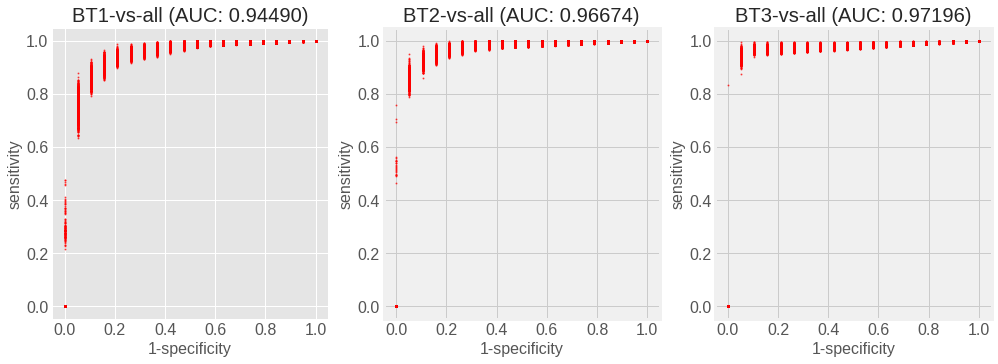

In [41]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='pXhase2results/P2_14_2_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase2results_new/ROC_phase2.png',dpi=400,bbox_inches='tight',transparent=True)


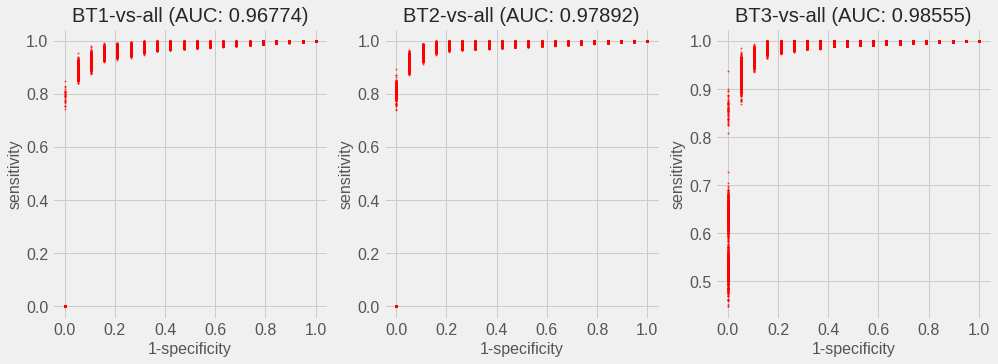

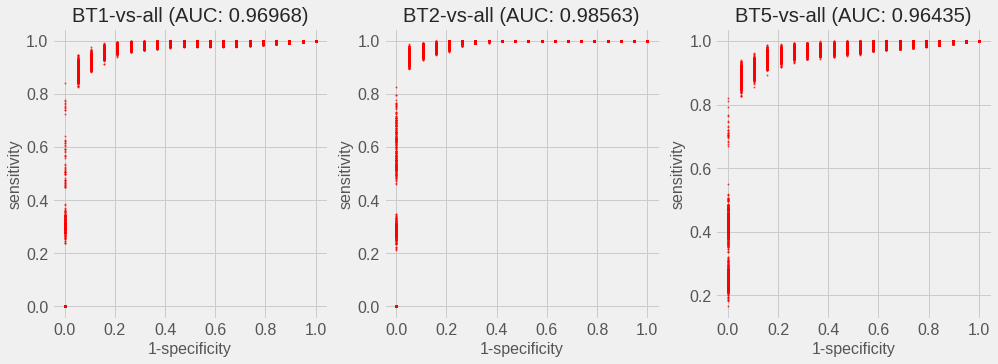

In [42]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='pXhase2results/P2_15_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase2results_new/ROCvall_phase2_max.png',dpi=400,bbox_inches='tight',transparent=True)



modelfile='pXhase2results/DSM2_12_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,5,plt.gca(),FS=16)
plt.savefig('./phase2results_new/ROCvall_clinical_DSM.png',dpi=400,bbox_inches='tight',transparent=True)



In [43]:
rho=0.04
s1=.388
PPV1=.146
s=.62
PPV=.178
A= (1 - ((s1*rho)/PPV1))
C= (1-s1)/(1-((s1*rho)/PPV1))
B=A*s*rho*((1/PPV)-1)*C
A,B

(0.8936986301369862, 0.07008981573033708)